# Hugo Schuchardt Archiv - Auswertung der Daten



In [27]:
import warnings
warnings.filterwarnings('ignore')
from cophi_toolbox import preprocessing
from dariah_topics import utils
from dariah_topics import postprocessing
from dariah_topics import visualization

import metadata_toolbox.utils as metadata
from pathlib import Path
import pandas as pd
import statistics
import sys
import os

In [98]:
data = 'Z:/TM_Schuchardt'

## Sprachen zählen

In [34]:
path_to_folder = Path(data, 'hsa_xml')
pattern = '{id}_{sender}_an_{reciever}_{date}_{language}' 
# z.B. 3048_Hugo Schuchardt_an_Ernst Dümmler_1902-05-28_deu

meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in path_to_folder.glob('*.xml')])
meta[:5] 

,id,sender,reciever,date,language
Z:\TM_Schuchardt\hsa_xml\100_Max-Leopold-Wagner_an_Hugo-Schuchardt_1924-02-05_deu.xml,100,Max-Leopold-Wagner,Hugo-Schuchardt,1924-02-05,deu
Z:\TM_Schuchardt\hsa_xml\1010_Graziadio-Isaia-Ascoli_an_Hugo-Schuchardt_1873-09-02_ita.xml,1010,Graziadio-Isaia-Ascoli,Hugo-Schuchardt,1873-09-02,ita
Z:\TM_Schuchardt\hsa_xml\101_Antonio-Machado-y-Álvarez_an_Hugo-Schuchardt_1881-09-03_spa.xml,101,Antonio-Machado-y-Álvarez,Hugo-Schuchardt,1881-09-03,spa
Z:\TM_Schuchardt\hsa_xml\102_Luis-Romero-y-Espinosa_an_Hugo-Schuchardt_1882-08-18_spa.xml,102,Luis-Romero-y-Espinosa,Hugo-Schuchardt,1882-08-18,spa
Z:\TM_Schuchardt\hsa_xml\103_Hugo-Schuchardt_an_Otto-Jespersen_1889-12-01_deu.xml,103,Hugo-Schuchardt,Otto-Jespersen,1889-12-01,deu


In [54]:
languages = []

for lang in meta['language']:
    languages.append(lang)

def get_languages(language):
    d = dict(zip(languages, [0] * len(languages)))
    for x in languages:
        d[x] += 1
    return d

d = get_languages(languages)
for w in sorted(d, key=d.get, reverse=True):
    print(w, d[w])

deu 1367
spa 389
ita 251
fra 124
por 77
eng 34
eus 10
nld 3
dan 3
lat 1
oci 1


In [35]:
l = []
for path in path_to_folder.glob('*.xml'):
    l.append(path.as_posix()) # Liefert den String des Pfades

l_deu = []
for title in l:
    if '_deu.xml' in title:
        l_deu.append(title)
print(len(l))        
print(l_deu[:5])
len(l_deu)

2260
['Z:/TM_Schuchardt/hsa_xml/100_Max-Leopold-Wagner_an_Hugo-Schuchardt_1924-02-05_deu.xml', 'Z:/TM_Schuchardt/hsa_xml/103_Hugo-Schuchardt_an_Otto-Jespersen_1889-12-01_deu.xml', 'Z:/TM_Schuchardt/hsa_xml/1056_Dirk-Christiaan-Hesseling_an_Hugo-Schuchardt_1914-01-13_deu.xml', 'Z:/TM_Schuchardt/hsa_xml/105_Gerhard-Bähr_an_Hugo-Schuchardt_1924-02-04_deu.xml', 'Z:/TM_Schuchardt/hsa_xml/1063_Hugo-Schuchardt_an_Matthias-de-Vries_1882-06-19_deu.xml']


1367

In [65]:
i = 0
for name in meta['sender']:
    if name == 'Hugo-Schuchardt':
        i+=1
print('Von Schuchardt versendet: ', i)

314


In [66]:
i = 0
for name in meta['reciever']:
    if name == 'Hugo-Schuchardt':
        i+=1
print('Von Schuchardt empfangen: ', i)

1945


In [48]:
l_mystery = []
for title in l:
    if 'an_Hugo-Schuchardt' not in title and 'Hugo-Schuchardt_an' not in title:
        l_mystery.append(title)

print(l_mystery)

['Z:/TM_Schuchardt/hsa_xml/1781_August-Schleicher_an_Ernst-Schuchardt_1868-07-03_deu.xml']


In [70]:
# Briefe pro AbsenderIn
sender = []

for name in meta['sender']:
    sender.append(name)

def get_senders(names):
    d = dict(zip(names, [0] * len(names)))
    for x in names:
        d[x] += 1
    return d

d = get_senders(sender)
for w in sorted(d, key=d.get, reverse=True):
    print(w, d[w])

Leo-Spitzer 445
Hugo-Schuchardt 314
Julio-de-Urquijo-Ybarra 240
Ferdinand-Blumentritt 144
Graziadio-Isaia-Ascoli 137
Adolf-Mussafia 55
Giovanni-de-Giacomo 43
Elise-Richter 40
Carolina-Michaëlis-de-Vasconcelos 39
Francisco-Adolfo-Coelho 33
Jan-Baudouin-de-Courtenay 29
Pio-Rajna 28
Otto-Jespersen 27
Charles-Baissac 24
Hermann-Suchier 23
Antonio-Machado-y-Álvarez 21
Rudolf-Trebitsch 21
Resurrección-María-de-Azkue-y-Aberasturi 21
Dirk-Christiaan-Hesseling 18
Gerhard-Bähr 15
Alfred-Morel-Fatio 14
Antonio-Griera-y-Gaja 14
Aniceto-dos-Reis-Gonçalves-Viana 14
Salvador-Calderón-y-Arana 13
Max-Leopold-Wagner 11
Georg-Curtius 11
Aaron-Marshall-Elliott 11
Johan-Hendrik-Caspar-Kern 11
Telesforo-de-Aranzadi-y-Unamuno 11
Trinidad-Hermenegildo-Pardo-de-Tavera 11
Matthias-de-Vries 10
Francisco-Rodríguez-Marín 10
Helene-von-Fleischhacker 10
Arturo-Campión-y-Jaymebon 10
Edward-Spencer-Dodgson 10
Johannes-Schmidt 10
Américo-Castro-Quesada 9
Tullio-Erber 9
Pedro-Francisco-Perry-da-Câmara 9
Juan-Valera 8
Ju

In [72]:
# Briefe pro EmpfängerIn
reciever = []

for name in meta['reciever']:
    reciever.append(name)

def get_recievers(names):
    d = dict(zip(names, [0] * len(names)))
    for x in names:
        d[x] += 1
    return d

d = get_recievers(reciever)
for w in sorted(d, key=d.get, reverse=True):
    print(w, d[w])

Hugo-Schuchardt 1945
Graziadio-Isaia-Ascoli 50
Jan-Baudouin-de-Courtenay 36
Julio-de-Urquijo-Ybarra 36
Elise-Richter 30
Hermann-Suchier 25
Carolina-Michaëlis-de-Vasconcelos 18
Resurrección-María-de-Azkue-y-Aberasturi 17
Adolf-Mussafia 17
Pio-Rajna 12
Otto-Jespersen 11
Edward-Spencer-Dodgson 9
Matthias-de-Vries 8
Georges-Lacombe 8
Friedrich-Diez 6
Hermann-Paul 4
Georg-Curtius 4
Lorenz-Diefenbach 3
Peter-Rosegger 3
Nicolaas-Mansvelt 2
Charles-Bally 2
Alfred-Morel-Fatio 2
Rodolfo-Lenz 2
Ernst-Dümmler 2
Ernst-Schuchardt 1
August-Friedrich-Pott 1
Ernst-Mach 1
Henry-Roseman-Lang 1
Eduard-Georg-Seler 1
Ernst-Robert-Curtius 1
Arturo-Campión-y-Jaymebon 1
Auguste-Etcheverry 1


<IPython.core.display.Javascript object>


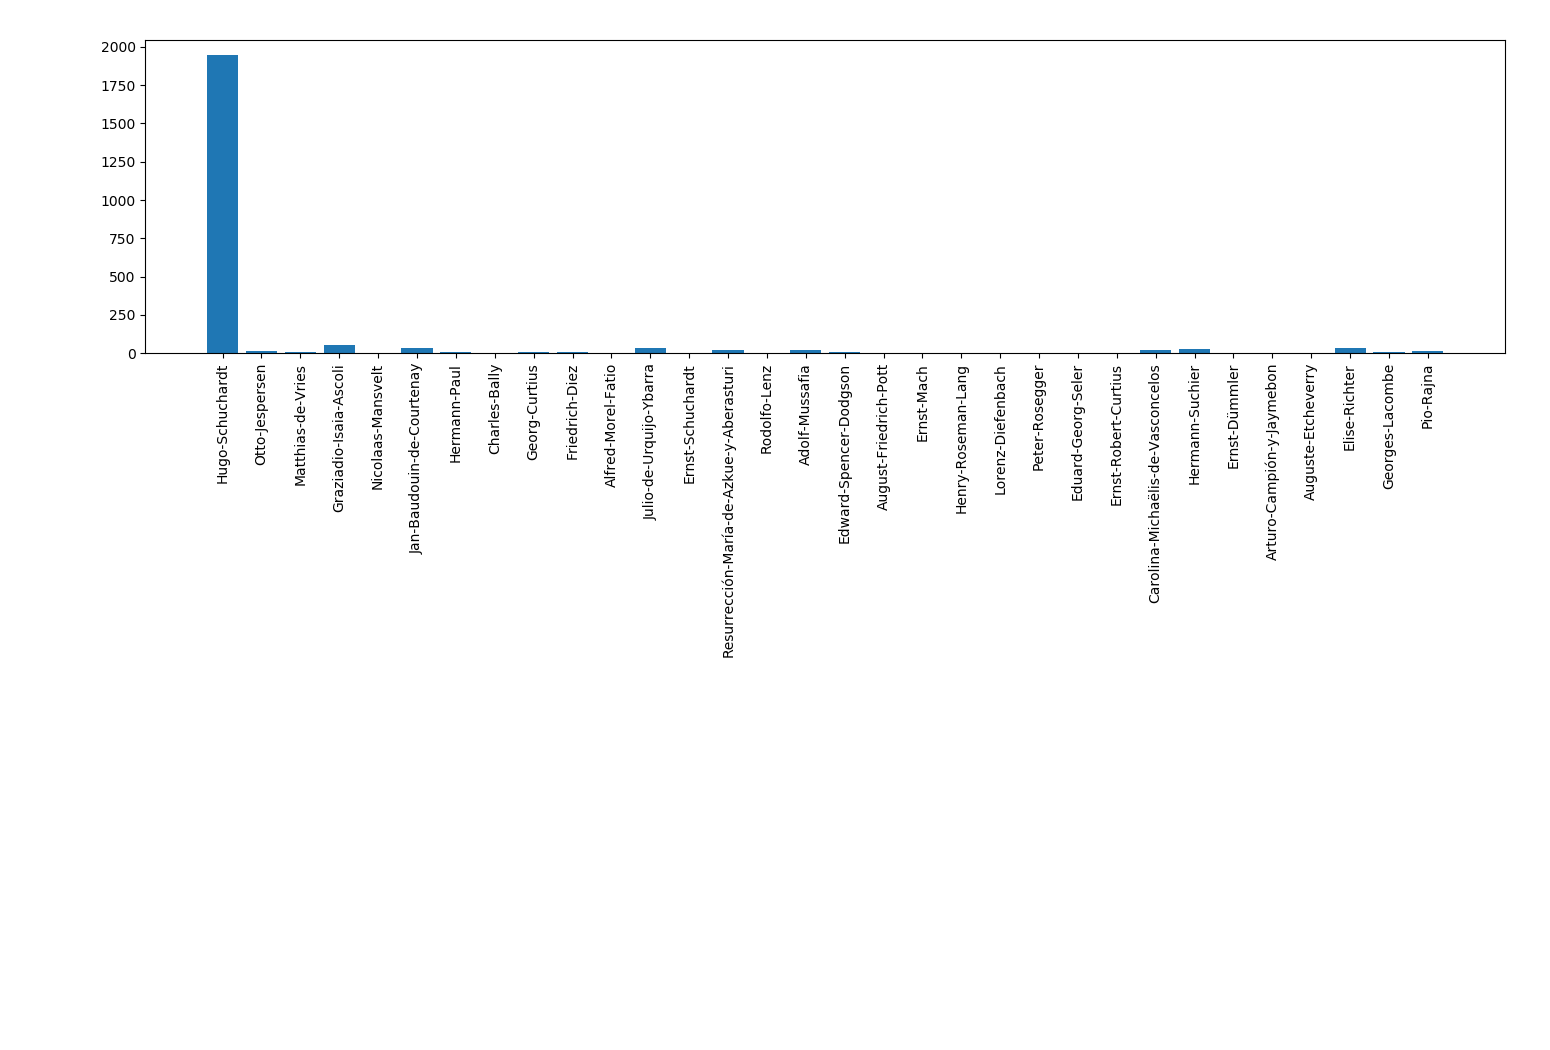

In [95]:
# Barchart mit matplotlib

%matplotlib notebook
#import numpy as np
import matplotlib.pyplot as plt

plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(15.5, 10.5, forward=True)
fig.savefig('Z:/Masterarbeit/TM_Dokumentation/test2png.png', dpi=100) #, bbox_inches='tight'

# Deutschsprachige Textdateien

In [ ]:
data = 'Z:/TM_Schuchardt'

In [99]:
path_to_folder = Path(data, 'hsa_txt_deu_cab')
pattern = '{id}_{sender}_an_{reciever}_{date}_{language}' 
# z.B. 3048_Hugo Schuchardt_an_Ernst Dümmler_1902-05-28_deu

meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in path_to_folder.glob('*.txt')])
meta[:5]

,id,sender,reciever,date,language
Z:\TM_Schuchardt\hsa_txt_deu_cab\100_Max-Leopold-Wagner_an_Hugo-Schuchardt_1924-02-05_deu.txt,100,Max-Leopold-Wagner,Hugo-Schuchardt,1924-02-05,deu
Z:\TM_Schuchardt\hsa_txt_deu_cab\103_Hugo-Schuchardt_an_Otto-Jespersen_1889-12-01_deu.txt,103,Hugo-Schuchardt,Otto-Jespersen,1889-12-01,deu
Z:\TM_Schuchardt\hsa_txt_deu_cab\1056_Dirk-Christiaan-Hesseling_an_Hugo-Schuchardt_1914-01-13_deu.txt,1056,Dirk-Christiaan-Hesseling,Hugo-Schuchardt,1914-01-13,deu
Z:\TM_Schuchardt\hsa_txt_deu_cab\105_Gerhard-Bähr_an_Hugo-Schuchardt_1924-02-04_deu.txt,105,Gerhard-Bähr,Hugo-Schuchardt,1924-02-04,deu
Z:\TM_Schuchardt\hsa_txt_deu_cab\1063_Hugo-Schuchardt_an_Matthias-de-Vries_1882-06-19_deu.txt,1063,Hugo-Schuchardt,Matthias-de-Vries,1882-06-19,deu


In [100]:
corpus = list(preprocessing.read_files(meta.index))
corpus[0][:255] # printing the first 255 characters of the first document

'\n    \n    \n        \nfür d überaus liebenswürdig Zusendung ihr " primitiae linguae vasconum " können ich sie nicht genug danken ; ich haben schon beginnen , mich in diese herrlich lichtvoll Darstellung d baskisch zu versenken und hoffen damit endgültig d B'

In [101]:
tokenized_corpus = [list(preprocessing.tokenize(document)) for document in corpus]

In [108]:
len(tokenized_corpus)

1366

In [111]:
# Länge der Dateien in Tokenanzahl
l = [int(len(document)) for document in tokenized_corpus]

In [104]:
print(min(l)) # kürzeste Datei
print(max(l)) # längste Datei

3
3947


In [106]:
print(statistics.mean(l)) # Durschschnittslänge

232.22913616398242


In [113]:
# Anzahl der Dateien mit 100 Tokens oder weniger
min_100 = 0
for i in l:
    if i >= 100:
        min_100 += 1
min_100 

879

In [114]:
max_99 = 0
for i in l:
    if i < 100:
        max_99 += 1
max_99

487

In [115]:
# Anzahl der Dateien mit 50 bis 200 Tokens
l_50_to_200 = 0
for i in l:
    if i < 201 and i > 49:
        l_50_to_200 += 1
l_50_to_200

620

In [116]:
# Anzahl der Dateien mit 20 Tokens oder weniger
max_19 = 0
for i in l:
    if i < 20:
        max_19 += 1
max_19

61

In [118]:
# Briefe pro AbsenderIn zählen und absteigend sortieren

sender = []

for name in meta['sender']:
    sender.append(name)

def get_senders(names):
    d = dict(zip(names, [0] * len(names)))
    for x in names:
        d[x] += 1
    return d

d = get_senders(sender)
for w in sorted(d, key=d.get, reverse=True):
    print(w, d[w])


Leo-Spitzer 445
Hugo-Schuchardt 265
Ferdinand-Blumentritt 140
Adolf-Mussafia 48
Elise-Richter 40
Carolina-Michaëlis-de-Vasconcelos 36
Jan-Baudouin-de-Courtenay 29
Otto-Jespersen 26
Hermann-Suchier 23
Rudolf-Trebitsch 21
Dirk-Christiaan-Hesseling 16
Gerhard-Bähr 14
Antonio-Griera-y-Gaja 12
Max-Leopold-Wagner 11
Georg-Curtius 11
Johan-Hendrik-Caspar-Kern 11
Matthias-de-Vries 10
Helene-von-Fleischhacker 10
Johannes-Schmidt 10
Tullio-Erber 9
Julius-Flittner 8
Telesforo-de-Aranzadi-y-Unamuno 7
Eduard-Sievers 7
Rodolfo-Lenz 7
Friedrich-Diez 7
Simon-Rutar 7
Franz-Nikolaus-Finck 7
August-Leskien 7
Karl-Friedrich-Christian-Brugmann 6
Peter-Rosegger 6
Paul-Kammerer 5
Nicolaas-Mansvelt 4
Emil-Jellinek 4
Hermann-Soyaux 4
Ernst-Mach 4
Frieda-Morf 4
Moses-Gaster 3
Julio-de-Urquijo-Ybarra 3
Ludwig-Tobler 3
August-Schleicher 3
Henry-Roseman-Lang 3
George-Karel-Niemann 3
Hermann-Osthoff 3
Regina-Mussafia 3
Lorenz-Diefenbach 3
Johann-Conrad-Labhart-Lutz 3
Otto-von-Reinsberg-Düringsfeld 3
Johannes-Theoph

## Deutschsprachige chunks

In [136]:
path_to_folder = Path('Z:/TM_Schuchardt/hsa_deu_chunks_100')
pattern = '{id}_{sender}_an_{reciever}_{date}_{language}_{chunk}' #bsp. 3048_Hugo Schuchardt_an_Ernst Dümmler_1902-05-28_deu_00

In [137]:
meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in path_to_folder.glob('*.txt')])
meta[:5] # by adding '[:5]' to the variable, only the first 5 elements will be print

,id,sender,reciever,date,language,chunk
Z:\TM_Schuchardt\hsa_deu_chunks_100\100_Max-Leopold-Wagner_an_Hugo-Schuchardt_1924-02-05_deu_0000.txt,100,Max-Leopold-Wagner,Hugo-Schuchardt,1924-02-05,deu,0000
Z:\TM_Schuchardt\hsa_deu_chunks_100\1056_Dirk-Christiaan-Hesseling_an_Hugo-Schuchardt_1914-01-13_deu_0000.txt,1056,Dirk-Christiaan-Hesseling,Hugo-Schuchardt,1914-01-13,deu,0000
Z:\TM_Schuchardt\hsa_deu_chunks_100\1056_Dirk-Christiaan-Hesseling_an_Hugo-Schuchardt_1914-01-13_deu_0001.txt,1056,Dirk-Christiaan-Hesseling,Hugo-Schuchardt,1914-01-13,deu,0001
Z:\TM_Schuchardt\hsa_deu_chunks_100\1056_Dirk-Christiaan-Hesseling_an_Hugo-Schuchardt_1914-01-13_deu_0002.txt,1056,Dirk-Christiaan-Hesseling,Hugo-Schuchardt,1914-01-13,deu,0002
Z:\TM_Schuchardt\hsa_deu_chunks_100\105_Gerhard-Bähr_an_Hugo-Schuchardt_1924-02-04_deu_0000.txt,105,Gerhard-Bähr,Hugo-Schuchardt,1924-02-04,deu,0000


In [138]:
corpus = list(preprocessing.read_files(meta.index))
corpus[0][:255] # printing the first 255 characters of the first document

'für d überaus liebenswürdig Zusendung ihr " primitiae linguae vasconum " können ich sie nicht genug danken ich haben schon beginnen mich in diese herrlich lichtvoll Darstellung d baskisch zu versenken und hoffen damit endgültig d Bann zu brechen die für i'

In [139]:
len(corpus)

3849

# Chunks pro AbsenderIn zählen

In [141]:
# 100-Token-Chunks pro AbsenderIn zählen und absteigend sortieren

sender = []

for name in meta['sender']:
    sender.append(name)

def get_senders(names):
    d = dict(zip(names, [0] * len(names)))
    for x in names:
        d[x] += 1
    return d

d = get_senders(sender)
for w in sorted(d, key=d.get, reverse=True):
    print(w, d[w])

Leo-Spitzer 1285
Hugo-Schuchardt 725
Ferdinand-Blumentritt 350
Gerhard-Bähr 197
Carolina-Michaëlis-de-Vasconcelos 139
Adolf-Mussafia 123
Jan-Baudouin-de-Courtenay 108
Elise-Richter 59
Johan-Hendrik-Caspar-Kern 49
Tullio-Erber 49
Johannes-Schmidt 48
Matthias-de-Vries 46
Hermann-Suchier 45
Otto-Jespersen 39
Simon-Rutar 36
Rodolfo-Lenz 34
Dirk-Christiaan-Hesseling 26
Julius-Flittner 26
Eduard-Sievers 23
Max-Leopold-Wagner 22
Nicolaas-Mansvelt 20
Georg-Curtius 20
Antonio-Griera-y-Gaja 20
Rudolf-Trebitsch 20
August-Leskien 20
Lorenz-Diefenbach 18
Karl-Friedrich-Christian-Brugmann 16
Hermann-Soyaux 16
Friedrich-Diez 15
Franz-Nikolaus-Finck 13
Johann-Georg-Krönlein 12
Adolph-Christian-Mann 12
Frieda-Morf 12
Paul-Kammerer 11
Telesforo-de-Aranzadi-y-Unamuno 10
Henry-Roseman-Lang 10
Otto-von-Reinsberg-Düringsfeld 10
Helene-von-Fleischhacker 9
Johannes-Brill 8
Ernst-Mach 8
Johannes-Theophilus-Hahn 7
Albert-Ludwig 7
Emil-Jellinek 7
George-Karel-Niemann 7
Hermann-Osthoff 7
Peter-Rosegger 7
Moses-Ga

## Auswahl von 100 pro Absender in 100er-Chunks 

In [127]:
path_to_folder = Path('Z:/TM_Schuchardt/hsa_deu_100_selected')
pattern = '{id}_{sender}_an_{reciever}_{date}_{language}_{chunk}' 

meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in path_to_folder.glob('*.txt')])
meta[:5] 

,id,sender,reciever,date,language,chunk
Z:\TM_Schuchardt\hsa_deu_100_selected\1180_Jan-Baudouin-de-Courtenay_an_Hugo-Schuchardt_1884-06-04_deu_00.txt,1180,Jan-Baudouin-de-Courtenay,Hugo-Schuchardt,1884-06-04,deu,00
Z:\TM_Schuchardt\hsa_deu_100_selected\1180_Jan-Baudouin-de-Courtenay_an_Hugo-Schuchardt_1884-06-04_deu_01.txt,1180,Jan-Baudouin-de-Courtenay,Hugo-Schuchardt,1884-06-04,deu,01
Z:\TM_Schuchardt\hsa_deu_100_selected\1180_Jan-Baudouin-de-Courtenay_an_Hugo-Schuchardt_1884-06-04_deu_02.txt,1180,Jan-Baudouin-de-Courtenay,Hugo-Schuchardt,1884-06-04,deu,02
Z:\TM_Schuchardt\hsa_deu_100_selected\1180_Jan-Baudouin-de-Courtenay_an_Hugo-Schuchardt_1884-06-04_deu_03.txt,1180,Jan-Baudouin-de-Courtenay,Hugo-Schuchardt,1884-06-04,deu,03
Z:\TM_Schuchardt\hsa_deu_100_selected\1180_Jan-Baudouin-de-Courtenay_an_Hugo-Schuchardt_1884-06-04_deu_04.txt,1180,Jan-Baudouin-de-Courtenay,Hugo-Schuchardt,1884-06-04,deu,04


In [128]:
# 100-Token-Chunks pro Absender zählen und absteigend sortieren

sender = []

for name in meta['sender']:
    sender.append(name)

def get_senders(names):
    d = dict(zip(names, [0] * len(names)))
    for x in names:
        d[x] += 1
    return d

d = get_senders(sender)
for w in sorted(d, key=d.get, reverse=True):
    print(w, d[w])

Gerhard-Bähr 118
Leo-Spitzer 115
Carolina-Michaëlis-de-Vasconcelos 114
Jan-Baudouin-de-Courtenay 105
Ferdinand-Blumentritt 104
Adolf-Mussafia 103
Elise-Richter 73
